# Ch2. Boosting

## 1. Fraud Detection 데이터

In [46]:
import pandas as pd
creditdata = pd.read_csv('./Data/creditcard.csv')
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [47]:
creditdata.iloc[:5, [0, 1, 2, 27,28, 29, 30]]

,Time,V1,V2,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,0.219422,0.215153,69.99,0


In [48]:
creditdata['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## 2. Imbalanced Data 문제

### 2-1. UnderSampling 문제
> 장점
- 훈련 데이터의 수가 감소해 계산 시간 줄어듦
- 클래스 오버랩이 줄어들어 분류에 용이
> 단점
- 제거된 데이터에 대한 정보 손실이 발생
> 대표적인 기법들
- Random Undersampling
- CNN 방법
- Tomek's link
- ENN 방법
- OSS 방법
- NCR 방법

In [49]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99],
                           random_state=1)

In [50]:
import pandas as pd
pd.Series(y).value_counts()

0    9853
1     147
dtype: int64

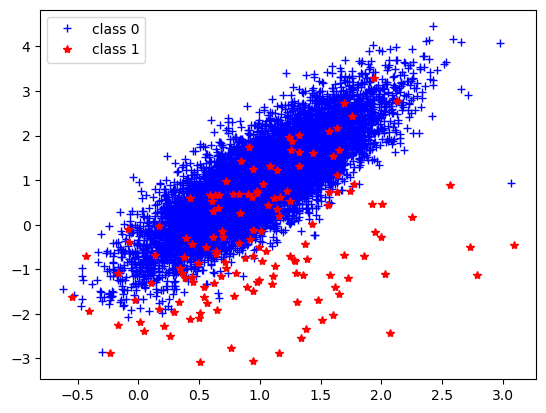

In [51]:
import matplotlib.pyplot as plt
plt.plot( X[y==0, 0], X[y==0, 1], 'b+', label='class 0')
plt.plot( X[y==1, 0], X[y==1, 1], 'r*', label='class 1')
plt.legend()

In [52]:
from imblearn.under_sampling import CondensedNearestNeighbour
undersample1 = CondensedNearestNeighbour(n_neighbors=1)
X1, y1 = undersample1.fit_resample(X, y)

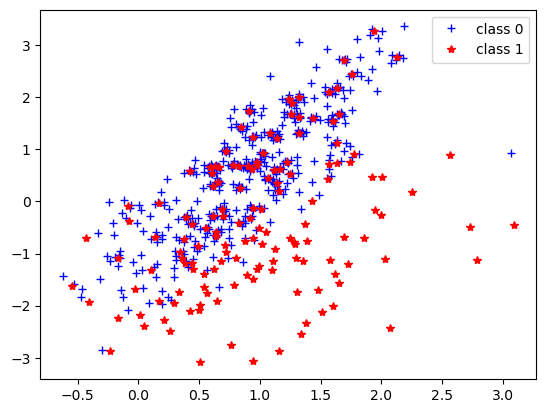

In [53]:
plt.plot( X1[y1==0, 0], X1[y1==0, 1], 'b+', label='class 0')
plt.plot( X1[y1==1, 0], X1[y1==1, 1], 'r*', label='class 1')
plt.legend()

In [54]:
pd.Series(y1).value_counts()

0    489
1    147
dtype: int64

In [55]:
from imblearn.under_sampling import TomekLinks
undersample2 = TomekLinks()
X2, y2 = undersample2.fit_resample(X, y)

In [56]:
pd.Series(y2).value_counts()

0    9801
1     147
dtype: int64

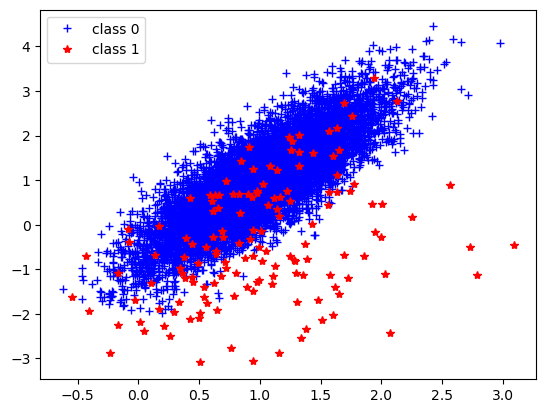

In [57]:
plt.plot( X2[y2==0, 0], X2[y2==0, 1], 'b+', label='class 0')
plt.plot( X2[y2==1, 0], X2[y2==1, 1], 'r*', label='class 1')
plt.legend()

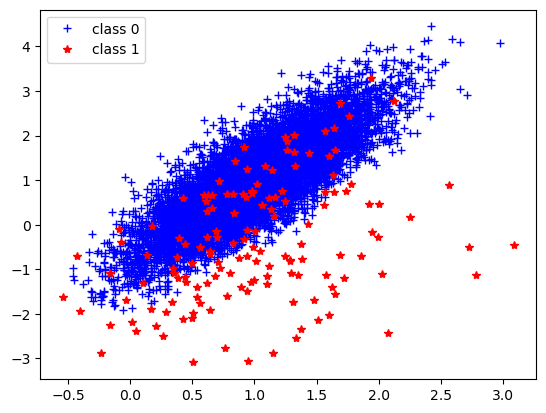

In [58]:
from imblearn.under_sampling import EditedNearestNeighbours
undersample3 = EditedNearestNeighbours(n_neighbors=3, kind_sel='all')
X3, y3 = undersample3.fit_resample(X, y)
plt.plot( X3[y3==0, 0], X3[y3==0, 1], 'b+', label='class 0')
plt.plot( X3[y3==1, 0], X3[y3==1, 1], 'r*', label='class 1')
plt.legend()

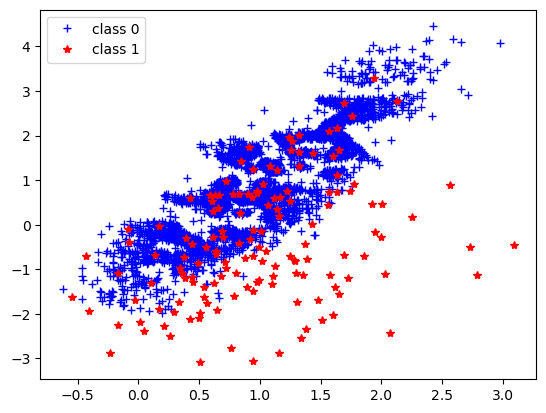

In [59]:
from imblearn.under_sampling import OneSidedSelection
undersample4 = OneSidedSelection(n_neighbors=1, n_seeds_S=100)
X4, y4 = undersample4.fit_resample(X, y)
plt.plot( X4[y4==0, 0], X4[y4==0, 1], 'b+', label='class 0')
plt.plot( X4[y4==1, 0], X4[y4==1, 1], 'r*', label='class 1')
plt.legend()

In [60]:
pd.Series(y4).value_counts()

0    4070
1     147
dtype: int64

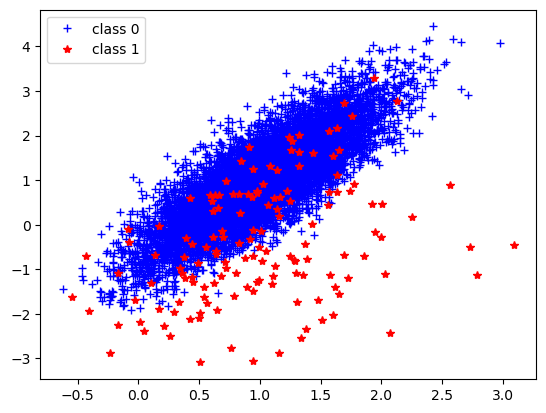

In [61]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
undersample3 = NeighbourhoodCleaningRule(n_neighbors=1, kind_sel='all', threshold_cleaning=0.5)
X5, y5 = undersample3.fit_resample(X, y)
plt.plot( X5[y5==0, 0], X5[y5==0, 1], 'b+', label='class 0')
plt.plot( X5[y5==1, 0], X5[y5==1, 1], 'r*', label='class 1')
plt.legend()

In [62]:
pd.Series(y5).value_counts()

0    9730
1     147
dtype: int64

### 2-2. OverSampling

> 장점
- 훈련 데이터 정보 손실 없음
- Undersampling 보다 분류 정확도가 높음
> 단점
- 데이터 증가로 계산시간 증가
- 이상치나 노이즈 영향 커짐
- 과적합 문제 발생
> 대표적인 OverSampling 기법
- Random OverSampling
- SMOTE
- ADASYN (Major 주변에서 많이 생기고, Minor 근처에서는 적게 생김)

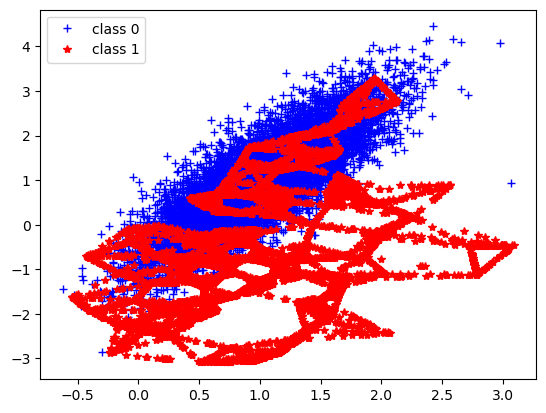

In [63]:
from imblearn.over_sampling import SMOTE
oversample1 = SMOTE()
OX1, Oy1 = oversample1.fit_resample(X, y)
plt.plot( OX1[Oy1==0, 0], OX1[Oy1==0, 1], 'b+', label="class 0" )
plt.plot( OX1[Oy1==1, 0], OX1[Oy1==1, 1], 'r*', label="class 1" )
plt.legend()

In [64]:
pd.Series(Oy1).value_counts()

0    9853
1    9853
dtype: int64

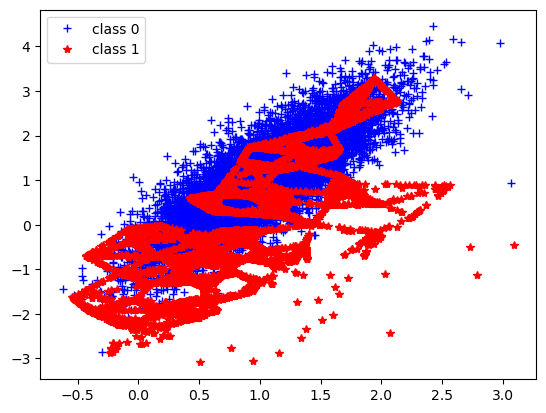

In [65]:
from imblearn.over_sampling import ADASYN
oversample2 = ADASYN()
OX2, Oy2 = oversample2.fit_resample(X, y)
plt.plot( OX2[Oy2==0, 0], OX2[Oy2==0, 1], 'b+', label="class 0" )
plt.plot( OX2[Oy2==1, 0], OX2[Oy2==1, 1], 'r*', label="class 1" )
plt.legend()

In [66]:
pd.Series(Oy2).value_counts()

0    9853
1    9837
dtype: int64

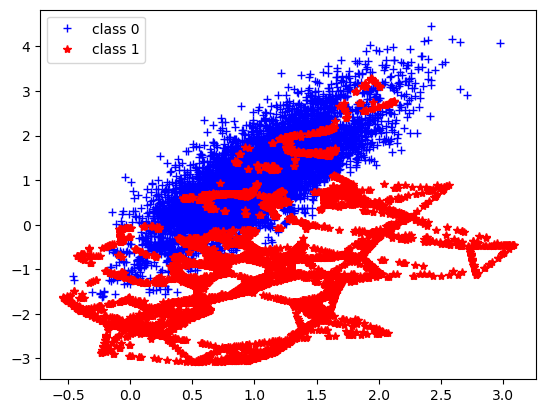

In [67]:
from imblearn.combine import SMOTEENN
mixsample1 = SMOTEENN()
MX1, My1 = mixsample1.fit_resample(X, y)
plt.plot( MX1[My1==0, 0], MX1[My1==0, 1], 'b+', label="class 0" )
plt.plot( MX1[My1==1, 0], MX1[My1==1, 1], 'r*', label="class 1" )
plt.legend()

In [68]:
pd.Series(My1).value_counts()

1    7744
0    7355
dtype: int64

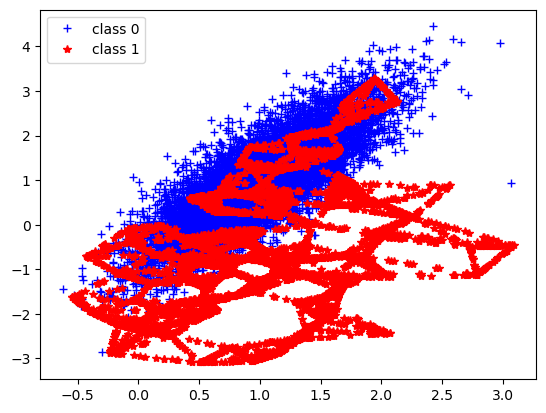

In [69]:
from imblearn.combine import SMOTETomek
mixsample2 = SMOTETomek()
MX2, My2 = mixsample2.fit_resample(X, y)
plt.plot( MX2[My2==0, 0], MX2[My2==0, 1], 'b+', label="class 0" )
plt.plot( MX2[My2==1, 0], MX2[My2==1, 1], 'r*', label="class 1" )
plt.legend()

In [70]:
pd.Series(My2).value_counts()

0    9322
1    9322
dtype: int64

## 3. Feature Engineering

### 3-1. Feature Selection vs Feature Extraction

> 특성 선택 (Selection)
- 특성변수 중, 불필요한거 지우고, 예측 성능 좋은 조합을 찾는 과정
- filtering, wrapper, embedded 방식
> 특성 추출 (Extraction)
- 특성변수 결합해 유용한 특성변수를 생성하는 과정
- PCA, LDA, SVD등 비지도 학습 중 차원 축소법 활용

cf) Feature Engineering의 경우 Deeplearning에서 적용

### 3-2. Feature Selection
> Filtering 방식
- 각 특성변수 별로 타겟에 대한 예측 성능 파악 후 우수한 특성변수만 선택
- score_func
- $\,\,\,$ 회귀모델 : f_regression, mutual_info_regression
- $\,\,\,$ 분류모델 : chi2, f_classif, mutual_info_classif
- k_percentile : 선택할 특성변수의 개수 또는 비율

> Wrapper 방식
- 예측 모델에 특성변수들의 subset을 만들어가며, 유용한 특성 변수의 조합을 선택

> Embedded 방식

In [71]:
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=8, n_redundant=12, random_state=1)
print(X.shape, y.shape)

(1000, 20) (1000,)


In [75]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

skb = SelectKBest(score_func=f_classif, k=10)
skb.fit(X, y)
skb.transform(X)

array([[-1.75135228,  3.2458225 , -1.95821488, ..., -2.33268409,
        -1.40842358,  1.0022857 ],
       [-1.60814293,  2.61191334, -1.14196616, ..., -1.25274632,
        -1.30801016,  0.38334159],
       [-1.91562334,  0.43773397, -1.94640102, ..., -0.70354232,
         1.34632433,  3.05080479],
       ...,
       [-2.09734165,  0.0705599 ,  0.32537784, ...,  1.51146134,
         1.94764668,  2.40174667],
       [-3.08580416,  1.41602372, -3.89909194, ..., -0.70876557,
         1.61140475,  1.53097879],
       [ 0.60000784,  0.05410591,  0.78184183, ..., -1.05383527,
        -0.36860027,  2.49055542]])

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=8, verbose=1)
rfefit = rfe.fit(X, y)

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.


In [77]:
rfefit.get_support()

array([ True,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True,  True,  True, False,
       False,  True])

In [78]:
rfefit.transform(X).shape

(1000, 8)

In [79]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(model, cv=5)
rfecvfit = rfecv.fit(X, y)

In [80]:
rfecvfit.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True])

In [ ]:
rfecvfit.transform(X).shape

(1000, 5)

In [81]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
selector = SelectFromModel(estimator=RandomForestClassifier())
selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier())

In [82]:
selector.get_support()

array([ True, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False,  True,  True, False,  True,
       False, False])

In [83]:
selector.transform(X).shape

(1000, 7)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
knn = KNeighborsClassifier( n_neighbors=3 )
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfsfit = sfs.fit(X, y)

In [85]:
sfsfit.get_support()

array([False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False])

In [86]:
sfsfit.transform(X).shape

(1000, 3)